In [1]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()

kalimat = 'bukannya cari solusi atau perbaikan kedepannya buat kinerja polisi ini malah utamain cari pembelaan capek'
print(stemmer.stem(kalimat))

bukan cari solusi atau baik depan buat kerja polisi ini malah utamain cari bela capek


In [4]:
from typing import Any
import snscrape.modules.twitter as crawler
import re
import pandas as pd
import traceback
import emoji

def remove_backslash_n(value: str) -> str:
    """"get rid \n from string"""
    return ' '.join(value.split())


def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

begone_emoji = get_emoji_regexp()

def preprocessing_data(text: Any) -> str:
    """"clean your data"""
    result = text.lower()
    result = re.sub(r'(@|https?)\S+|#[A-Za-z0-9_]+', '', result).replace("&amp;", "dan")
    result = re.sub(r'[^\w\s]', ' ', result)
    result = re.sub(r'\d', '', result)
    result = remove_backslash_n(result).strip()
    result = begone_emoji.sub(repl='', string=result)
    return result


query = '("e-Tilang" OR "etilang" OR "tilang elektronik" OR "etle" OR "e-tle")'
time_start = '2022-10-01'
time_end = '2022-10-31'
file_name = r'data oktober-des 2022 etilang tanpa lang dan etle.xlsx'
tweet_list = []
sheet_name = "data crawl oct-des 2022"
clean_data = False
try:
    for i, tweet in enumerate(
            crawler.TwitterSearchScraper(f'{query} until:{time_end} since:{time_start} lang:id').get_items()):
        try:
            if i > 15000:
                break
            if clean_data:
                clean_tweet = preprocessing_data(tweet.content)
                tweet_list.append(clean_tweet)
            else:
                tweet_list.append(tweet.content)
        except:
            pass

    print(f"{len(tweet_list)} tweets scraped!")
    print("removing duplicate tweets")
    result_ = list(set(tweet_list))
    print(f"{len(result_)} tweets left after cleaning")
    data_frame = pd.DataFrame(result_)

except:
    traceback.print_exc()


C:\Users\MSI\AppData\Local\Temp\ipykernel_25716\974655089.py:50: FutureWarning: content is deprecated, use rawContent instead
  tweet_list.append(tweet.content)


2433 tweets scraped!
removing duplicate tweets
2414 tweets left after cleaning


In [3]:
data_frame.to_excel(file_name, sheet_name=sheet_name, index=False)

In [5]:
data_frame.head()

,0
0,Waspada Modus Penipuan Tilang Elektronik via W...
1,@bennym2803 @sopir_idiot Bagaimana dgn pemotor...
2,@Wtf____vro Hve hu pn nhi bnau.. em pn khas bh...
3,"Kapolri Tegas Larang Polantas Tilang Manual, B..."
4,@siapkawalpolri @ListyoSigitP Setuju banget! D...


In [4]:
data_frame.head()

,0
0,patut diapresiasi kerja polri gercep
1,mengapresiasi kinerja polisi di dlm tragedi ka...
2,kinerja polri makin lamban pak
3,patut diacungi jempol kinerja polri sebagai pe...
4,cara kerja polisi sambo ternyata masih ada kir...


In [3]:
data_frame[0]

0       percumalaporpolisi sange_aaaaaaaaa slotgacorha...
1       percumalaporpolisi buzzer polisitembakpolisi p...
2       kalau lelet jangan segan gantikapolri pakde ta...
3       emang kapan institusi ini bisa berguna percuma...
4       kapolri bilang silahkan mengkritisi kinerja po...
                              ...                        
6964    masa kinerja polisi spt ini pak kombes cuma te...
6965    bener percumalaporpolisi sih netizen yg gerak ...
6966    nuber jeans boyfriend link tags minion pelukan...
6967    halahhh paling klarifikasi materai minta maaf ...
6968    aing apresiasi kinerja polri dan kejagung dlam...
Name: 0, Length: 6969, dtype: object

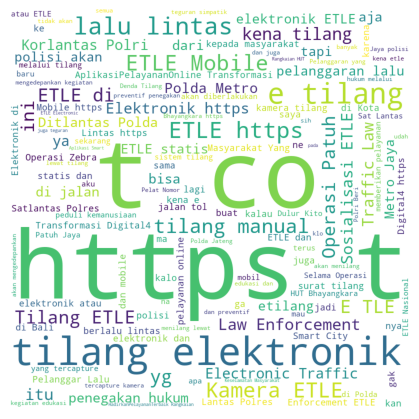

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopword = set(STOPWORDS)
comment_words = ''
for val in data_frame[0]:
    tokens = val.split()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 9).generate(comment_words)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [21]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
new_list =[]
stemmer = StemmerFactory().create_stemmer()
for value in result_:
    temp = stemmer.stem(value)
    print(temp)
    new_list.append(temp)
new_list


patut apresiasi kerja polri gercep
apresiasi kerja polisi di dlm tragedi kanjuruhan adalah buah ironi saya bisa paham kalo itu laku humas polri tentu dar untuk citra
kerja polri makin lamban pak
patut acung jempol kerja polri bagai jaga ham
cara kerja polisi sambo nyata masih ada kirain udah hilang
kompolnas ini bukan kerja awas kerja polisi ya
dan kadiv propam sesuai atur pres tahun tentang susun tata kerja polri atur bahwa kadiv propam tara dengan eselon ib
kerja polisi lg awas oleh rakyat krn insiden blunder awal yg telah sebar isu hoax tembak tembak apakah insiden ini akan ulang kembali lanjut part
mau ngomong apalagi yah tentang polisi kalo saban hari baca kasus udah gin parah lapor polisi tapi kok yah begini cara kerja polisi yah
kabar baik akhir kasus sambo udah p dengan ini bukti bahwa kerja polri makin baik psambocs bukti komitmen polri
sepakat sudah patut komitmen dan kerja polri kudu profesional sesuai dgn arah presiden
netizen aku kerja polisi presisi tiap selidik video mes

['patut apresiasi kerja polri gercep',
 'apresiasi kerja polisi di dlm tragedi kanjuruhan adalah buah ironi saya bisa paham kalo itu laku humas polri tentu dar untuk citra',
 'kerja polri makin lamban pak',
 'patut acung jempol kerja polri bagai jaga ham',
 'cara kerja polisi sambo nyata masih ada kirain udah hilang',
 'kompolnas ini bukan kerja awas kerja polisi ya',
 'dan kadiv propam sesuai atur pres tahun tentang susun tata kerja polri atur bahwa kadiv propam tara dengan eselon ib',
 'kerja polisi lg awas oleh rakyat krn insiden blunder awal yg telah sebar isu hoax tembak tembak apakah insiden ini akan ulang kembali lanjut part',
 'mau ngomong apalagi yah tentang polisi kalo saban hari baca kasus udah gin parah lapor polisi tapi kok yah begini cara kerja polisi yah',
 'kabar baik akhir kasus sambo udah p dengan ini bukti bahwa kerja polri makin baik psambocs bukti komitmen polri',
 'sepakat sudah patut komitmen dan kerja polri kudu profesional sesuai dgn arah presiden',
 'netizen a

In [22]:
data_frame = pd.DataFrame(result_)

In [10]:
from datetime import datetime
file_name = str(f'e-tilang + etle + lang_id jun-des 22.xlsx')
sheet_name = str('sheet-1')
data_frame.to_excel(file_name, sheet_name=sheet_name, index=False)